## importing libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [24]:
dataset= pd.read_csv('Mall_Customers.csv')
X=dataset.iloc[ : , [3,4] ].values

In [25]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## Using the elbow method to find out the optimal number of clusters

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting t

[269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156595, 21862.09267218289, 19672.07284901432]


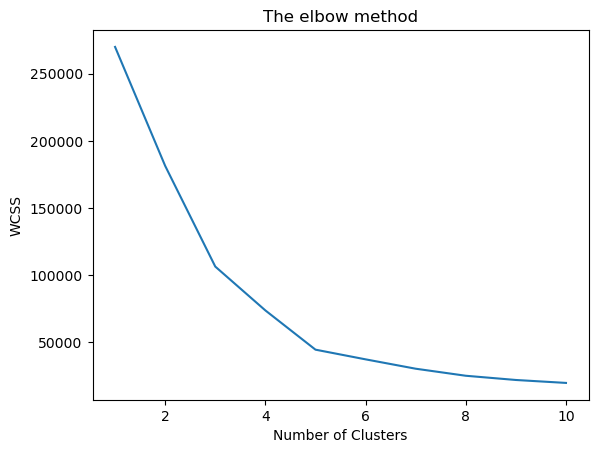

In [26]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    Kmeans= KMeans(n_clusters=i, init = "k-means++", random_state=42)
    Kmeans.fit(X)
    wcss.append(Kmeans.inertia_)
print(wcss)
plt.plot(range(1, 11), wcss)
plt.title("The elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

## Training the K-means clustering on the dataset

In [27]:
Kmeans= KMeans(n_clusters=5, init = "k-means++", random_state=42)
Kmeans_y= Kmeans.fit_predict(X)

D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\plant_pathology\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [28]:
print(Kmeans_y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualizig the clusters

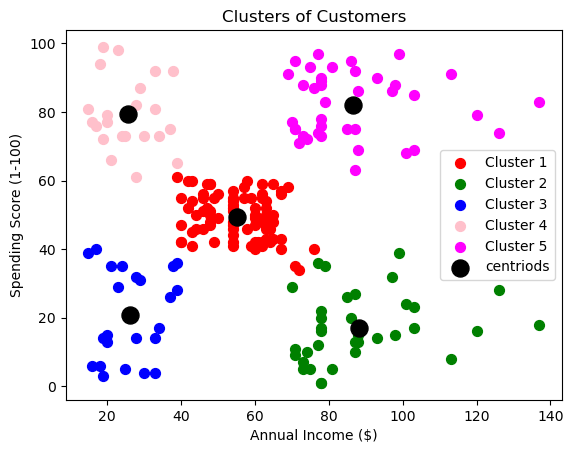

In [36]:
plt.scatter(X[Kmeans_y==0,0],X[Kmeans_y==0,1], s=50, c='red',label='Cluster 1')
plt.scatter(X[Kmeans_y==1,0],X[Kmeans_y==1,1], s=50, c='green',label='Cluster 2')
plt.scatter(X[Kmeans_y==2,0],X[Kmeans_y==2,1], s=50, c='blue',label='Cluster 3')
plt.scatter(X[Kmeans_y==3,0],X[Kmeans_y==3,1], s=50, c='pink',label='Cluster 4')
plt.scatter(X[Kmeans_y==4,0],X[Kmeans_y==4,1], s=50, c='magenta',label='Cluster 5')
plt.scatter(Kmeans.cluster_centers_[ : , 0 ] ,Kmeans.cluster_centers_[ : , 1 ], s=150, c='black', label='centriods' )
plt.title('Clusters of Customers')
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()